In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [9]:
# Update the path if necessary
data = pd.read_csv("Mall_Customers.csv")
data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
print(data.info())
print(data.describe())
print(data.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000    

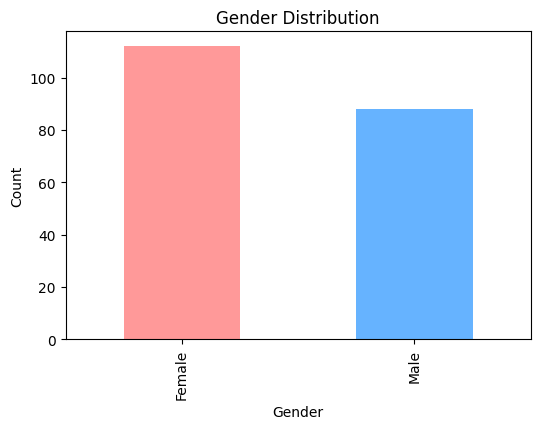

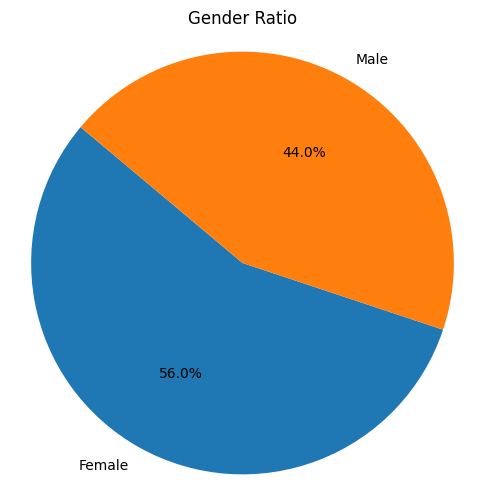

In [11]:
gender_counts = data['Gender'].value_counts()

# Bar plot
plt.figure(figsize=(6,4))
gender_counts.plot(kind='bar', color=['#ff9999','#66b3ff'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Pie Chart
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Ratio')
plt.axis('equal')
plt.show()


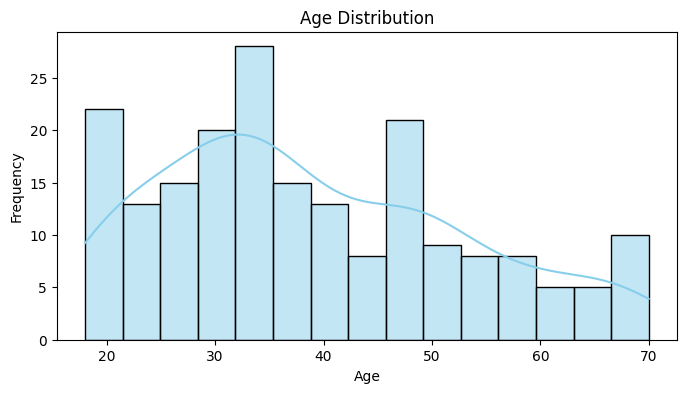

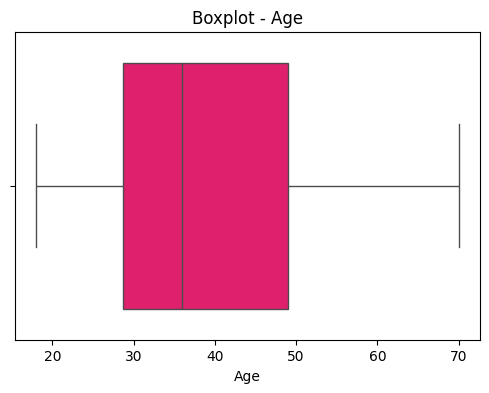

In [12]:
plt.figure(figsize=(8,4))
sns.histplot(data['Age'], bins=15, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x=data['Age'], color='#ff0066')
plt.title('Boxplot - Age')
plt.show()


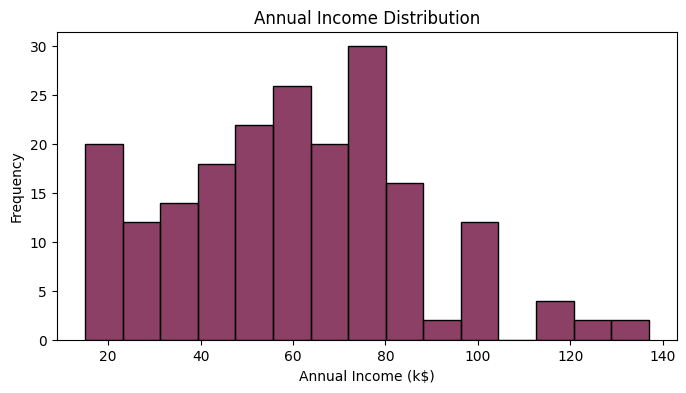

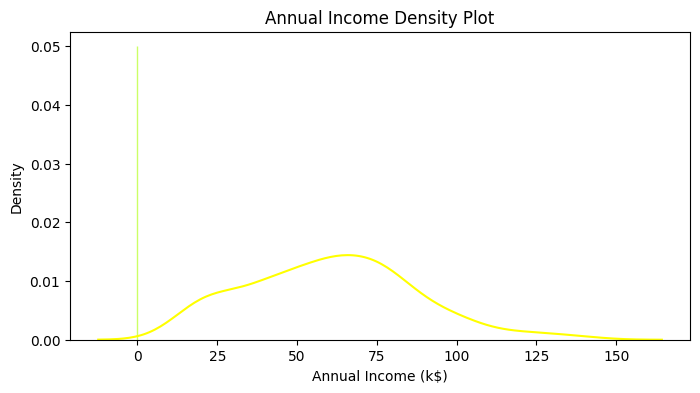

In [13]:
# Histogram
plt.figure(figsize=(8,4))
sns.histplot(data['Annual Income (k$)'], bins=15, color='#660033')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.show()

# Density Plot
plt.figure(figsize=(8,4))
sns.kdeplot(data['Annual Income (k$)'], color='yellow')
plt.fill_betweenx(y=[0, 0.05], x1=0, x2=0, color='#ccff66')
plt.title('Annual Income Density Plot')
plt.xlabel('Annual Income (k$)')
plt.show()


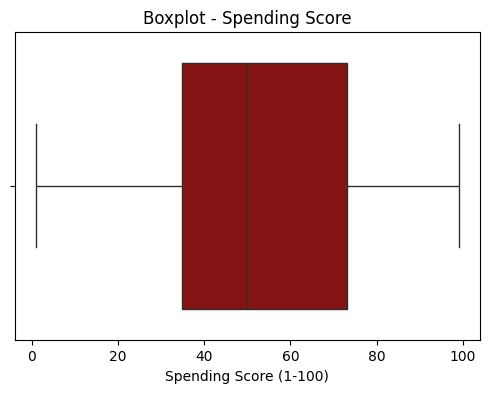

In [14]:
plt.figure(figsize=(6,4))
sns.boxplot(x=data['Spending Score (1-100)'], color='#990000')
plt.title('Boxplot - Spending Score')
plt.show()


In [15]:
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


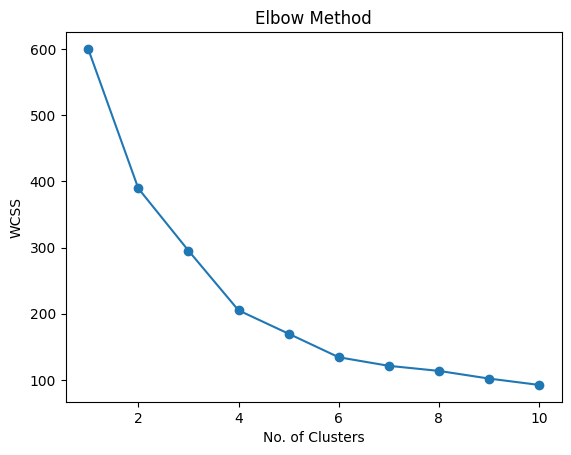

In [16]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()


In [17]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
data['Cluster'] = clusters


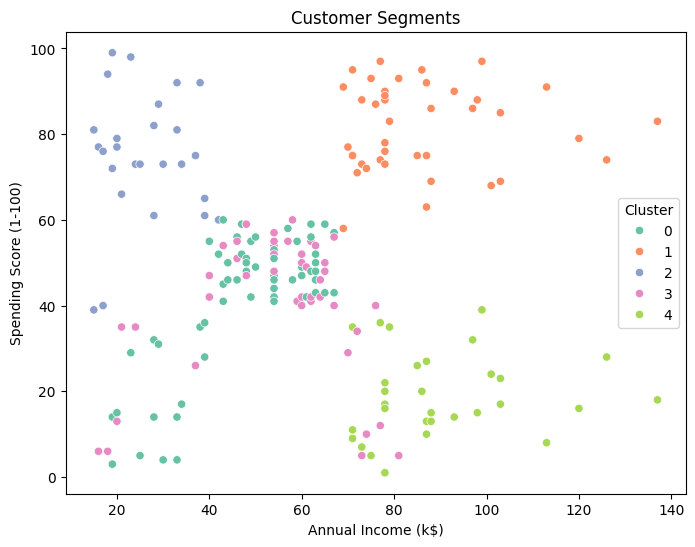

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set2')
plt.title('Customer Segments')
plt.show()


In [19]:
data.to_csv("Segmented_Customers.csv", index=False)
